# Stock Market Prediction Using Stacked LSTM

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [6]:
df.sample

<bound method NDFrame.sample of             Date    Open    High     Low    Last   Close  \
0     2018-10-08  208.00  222.25  206.85  216.00  215.15   
1     2018-10-05  217.00  218.60  205.90  210.25  209.20   
2     2018-10-04  223.50  227.80  216.15  217.25  218.20   
3     2018-10-03  230.00  237.50  225.75  226.45  227.60   
4     2018-10-01  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  2013-10-14  160.85  161.45  157.70  159.30  159.45   
1231  2013-10-11  161.15  163.45  159.00  159.80  160.05   
1232  2013-10-10  156.00  160.80  155.85  160.30  160.15   
1233  2013-10-09  155.70  158.20  154.15  155.30  155.55   
1234  2013-10-08  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                4642146.0         10062.83  
1                3519515.0          7407.06  
2                1728786.0          3815.79  
3                1708590.0          3960.27  
4                

In [7]:
df.shape

(1235, 8)

In [8]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1230,False,False,False,False,False,False,False,False
1231,False,False,False,False,False,False,False,False
1232,False,False,False,False,False,False,False,False
1233,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
srt = df.sort_values(by='Date')
srt

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


In [11]:
srt.reset_index(inplace=True)
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


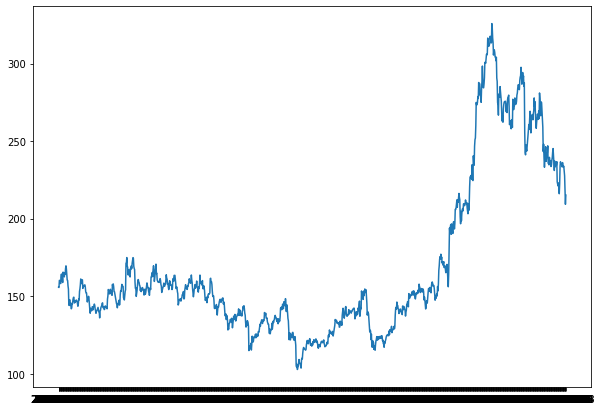

In [12]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [13]:
close_srt = srt['Close']
close_srt

0       155.80
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230    230.90
1231    227.60
1232    218.20
1233    209.20
1234    215.15
Name: Close, Length: 1235, dtype: float64

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [15]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data, test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [16]:
train_data.shape

(864, 1)

In [17]:
test_data.shape

(371, 1)

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(x_train.shape)
print(y_train.shape)

(763, 100)
(763,)


In [21]:
print(x_test.shape)
print(y_test.shape)

(270, 100)
(270,)


In [22]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [23]:
x_train

array([[[0.23823398],
        [0.2371134 ],
        [0.25773196],
        ...,
        [0.17279247],
        [0.16651726],
        [0.16606903]],

       [[0.2371134 ],
        [0.25773196],
        [0.25728373],
        ...,
        [0.16651726],
        [0.16606903],
        [0.14926042]],

       [[0.25773196],
        [0.25728373],
        [0.25459435],
        ...,
        [0.16606903],
        [0.14926042],
        [0.16920663]],

       ...,

       [[0.08628418],
        [0.10197221],
        [0.07171672],
        ...,
        [0.21290901],
        [0.21470193],
        [0.22075303]],

       [[0.10197221],
        [0.07171672],
        [0.06432093],
        ...,
        [0.21470193],
        [0.22075303],
        [0.22411475]],

       [[0.07171672],
        [0.06432093],
        [0.0835948 ],
        ...,
        [0.22075303],
        [0.22411475],
        [0.22590766]]])

In [24]:
x_test

array([[[0.22747647],
        [0.22008068],
        [0.21447781],
        ...,
        [0.42738682],
        [0.4255939 ],
        [0.40632004]],

       [[0.22008068],
        [0.21447781],
        [0.2097714 ],
        ...,
        [0.4255939 ],
        [0.40632004],
        [0.42155984]],

       [[0.21447781],
        [0.2097714 ],
        [0.20394442],
        ...,
        [0.40632004],
        [0.42155984],
        [0.46302107]],

       ...,

       [[0.84872255],
        [0.81846706],
        [0.82855222],
        ...,
        [0.58538772],
        [0.58762887],
        [0.57485433]],

       [[0.81846706],
        [0.82855222],
        [0.6869117 ],
        ...,
        [0.58762887],
        [0.57485433],
        [0.56006275]],

       [[0.82855222],
        [0.6869117 ],
        [0.62752129],
        ...,
        [0.57485433],
        [0.56006275],
        [0.51792918]]])

In [25]:
# Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
# creating the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 9s 334ms/step - loss: 0.0090 - val_loss: 0.0016
Epoch 2/60
11/11 [==============================] - 2s 173ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 3/60
11/11 [==============================] - 2s 162ms/step - loss: 0.0020 - val_loss: 8.5649e-04
Epoch 4/60
11/11 [==============================] - 2s 162ms/step - loss: 0.0013 - val_loss: 5.7237e-04
Epoch 5/60
11/11 [==============================] - 2s 163ms/step - loss: 0.0010 - val_loss: 6.4108e-04
Epoch 6/60
11/11 [==============================] - 2s 171ms/step - loss: 9.5869e-04 - val_loss: 7.0604e-04
Epoch 7/60
11/11 [==============================] - 2s 167ms/step - loss: 9.4170e-04 - val_loss: 7.9324e-04
Epoch 8/60
11/11 [==============================] - 2s 171ms/step - loss: 9.2046e-04 - val_loss: 8.1373e-04
Epoch 9/60
11/11 [==============================] - 2s 171ms/step - loss: 9.1556e-04 - val_loss: 7.5885e-04
Epoch 10/60
11/11 [==============================] - 2s 

In [29]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

9/9 [==============================] - 0s 37ms/step


In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error

In [32]:
math.sqrt(mean_squared_error(y_train, train_predict))

141.43832291514806

In [33]:
math.sqrt(mean_squared_error(y_test, test_predict))

255.16398221442563

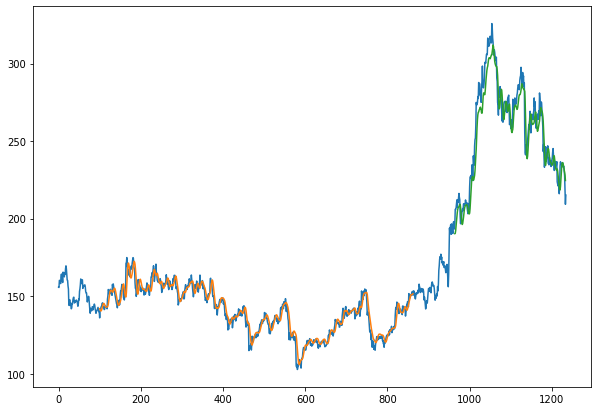

In [34]:
look_back = 100

trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1, :] = test_predict

plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Prediction for next 30 Days

In [35]:
len(test_data)

371

In [36]:
pred_input = test_data[271:].reshape(1,-1)
pred_input.shape

(1, 100)

In [37]:
temp_input = list(pred_input)
temp_input = temp_input[0].tolist()

In [38]:
temp_input

[0.6275212909009413,
 0.6205737337516808,
 0.6492604213357238,
 0.6367099955177049,
 0.6315553563424474,
 0.6476916181084715,
 0.6613626176602418,
 0.680636485880771,
 0.6956521739130435,
 0.7082025997310621,
 0.694083370685791,
 0.7254594352308381,
 0.7465262214253696,
 0.7198565665620797,
 0.6839982070820259,
 0.722097714029583,
 0.7310623038995965,
 0.7371134020618557,
 0.7364410578216045,
 0.7218735992828327,
 0.739354549529359,
 0.7483191393993724,
 0.7850739578664276,
 0.7597489914836395,
 0.7740923352756612,
 0.7368892873151054,
 0.7090990587180637,
 0.6972209771402957,
 0.714701927386822,
 0.7254594352308381,
 0.7382339757956073,
 0.7303899596593455,
 0.7229941730165843,
 0.7471985656656208,
 0.7252353204840878,
 0.7994173016584492,
 0.7828328103989242,
 0.7557149260421334,
 0.7335275661138503,
 0.7736441057821604,
 0.7714029583146571,
 0.7492155983863737,
 0.7285970416853427,
 0.7003585835948003,
 0.6302106678619452,
 0.6510533393097264,
 0.6095921111609144,
 0.584715374271626

In [39]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        pred_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,pred_input))
        pred_input = pred_input.reshape(1,-1)
        pred_input = pred_input.reshape(1, n_steps, 1)
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape(1, n_steps, 1)
        yhat = model.predict(pred_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.5022511]
101
1 day input [0.62057373 0.64926042 0.63671    0.63155536 0.64769162 0.66136262
 0.68063649 0.69565217 0.7082026  0.69408337 0.72545944 0.74652622
 0.71985657 0.68399821 0.72209771 0.7310623  0.7371134  0.73644106
 0.7218736  0.73935455 0.74831914 0.78507396 0.75974899 0.77409234
 0.73688929 0.70909906 0.69722098 0.71470193 0.72545944 0.73823398
 0.73038996 0.72299417 0.74719857 0.72523532 0.7994173  0.78283281
 0.75571493 0.73352757 0.77364411 0.77140296 0.7492156  0.72859704
 0.70035858 0.63021067 0.65105334 0.60959211 0.58471537 0.609368
 0.63043478 0.64388167 0.6017481  0.61160914 0.62572837 0.62550426
 0.64657104 0.59614523 0.59524877 0.59166293 0.61340206 0.6048857
 0.59928283 0.60354101 0.58673241 0.5912147  0.60466159 0.61272972
 0.62909009 0.63872703 0.61810847 0.59524877 0.57530255 0.60242044
 0.58583595 0.5912147  0.59771403 0.59009413 0.60085164 0.5425818
 0.53675482 0.53070372 0.53922008 0.5349619  0.50806813 0.53787539
 0.58852532 0.60040341 0.59345585 0.59

8 day output [[0.4792889]]
9 day input [0.7082026  0.69408337 0.72545944 0.74652622 0.71985657 0.68399821
 0.72209771 0.7310623  0.7371134  0.73644106 0.7218736  0.73935455
 0.74831914 0.78507396 0.75974899 0.77409234 0.73688929 0.70909906
 0.69722098 0.71470193 0.72545944 0.73823398 0.73038996 0.72299417
 0.74719857 0.72523532 0.7994173  0.78283281 0.75571493 0.73352757
 0.77364411 0.77140296 0.7492156  0.72859704 0.70035858 0.63021067
 0.65105334 0.60959211 0.58471537 0.609368   0.63043478 0.64388167
 0.6017481  0.61160914 0.62572837 0.62550426 0.64657104 0.59614523
 0.59524877 0.59166293 0.61340206 0.6048857  0.59928283 0.60354101
 0.58673241 0.5912147  0.60466159 0.61272972 0.62909009 0.63872703
 0.61810847 0.59524877 0.57530255 0.60242044 0.58583595 0.5912147
 0.59771403 0.59009413 0.60085164 0.5425818  0.53675482 0.53070372
 0.53922008 0.5349619  0.50806813 0.53787539 0.58852532 0.60040341
 0.59345585 0.59278351 0.59143882 0.58561183 0.59816226 0.58987001
 0.58538772 0.58762887 0

17 day output [[0.4903744]]
18 day input [0.73644106 0.7218736  0.73935455 0.74831914 0.78507396 0.75974899
 0.77409234 0.73688929 0.70909906 0.69722098 0.71470193 0.72545944
 0.73823398 0.73038996 0.72299417 0.74719857 0.72523532 0.7994173
 0.78283281 0.75571493 0.73352757 0.77364411 0.77140296 0.7492156
 0.72859704 0.70035858 0.63021067 0.65105334 0.60959211 0.58471537
 0.609368   0.63043478 0.64388167 0.6017481  0.61160914 0.62572837
 0.62550426 0.64657104 0.59614523 0.59524877 0.59166293 0.61340206
 0.6048857  0.59928283 0.60354101 0.58673241 0.5912147  0.60466159
 0.61272972 0.62909009 0.63872703 0.61810847 0.59524877 0.57530255
 0.60242044 0.58583595 0.5912147  0.59771403 0.59009413 0.60085164
 0.5425818  0.53675482 0.53070372 0.53922008 0.5349619  0.50806813
 0.53787539 0.58852532 0.60040341 0.59345585 0.59278351 0.59143882
 0.58561183 0.59816226 0.58987001 0.58538772 0.58762887 0.57485433
 0.56006275 0.51792918 0.47758853 0.50425818 0.50225109 0.48867786
 0.48076013 0.47659889 

26 day output [[0.4663421]]
27 day input [0.69722098 0.71470193 0.72545944 0.73823398 0.73038996 0.72299417
 0.74719857 0.72523532 0.7994173  0.78283281 0.75571493 0.73352757
 0.77364411 0.77140296 0.7492156  0.72859704 0.70035858 0.63021067
 0.65105334 0.60959211 0.58471537 0.609368   0.63043478 0.64388167
 0.6017481  0.61160914 0.62572837 0.62550426 0.64657104 0.59614523
 0.59524877 0.59166293 0.61340206 0.6048857  0.59928283 0.60354101
 0.58673241 0.5912147  0.60466159 0.61272972 0.62909009 0.63872703
 0.61810847 0.59524877 0.57530255 0.60242044 0.58583595 0.5912147
 0.59771403 0.59009413 0.60085164 0.5425818  0.53675482 0.53070372
 0.53922008 0.5349619  0.50806813 0.53787539 0.58852532 0.60040341
 0.59345585 0.59278351 0.59143882 0.58561183 0.59816226 0.58987001
 0.58538772 0.58762887 0.57485433 0.56006275 0.51792918 0.47758853
 0.50425818 0.50225109 0.48867786 0.48076013 0.47659889 0.47482184
 0.47460994 0.47548586 0.47713175 0.47928891 0.48171973 0.48420158
 0.4865329  0.48854274

# Ploting last 130 days Closing Price

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [41]:
len(close_srt)

1235

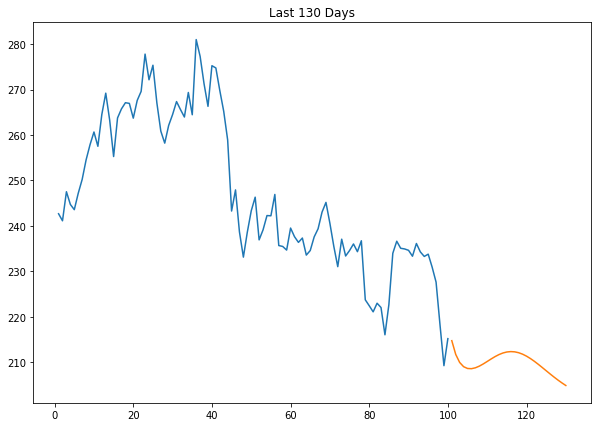

In [42]:
plt.figure(figsize=(10,7))
plt.plot(day_new, scaler.inverse_transform(close_srt[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title("Last 130 Days")
plt.show()

In [43]:
dff = close_srt.tolist()
dff.extend(lst_output)

In [44]:
len(dff)

1265

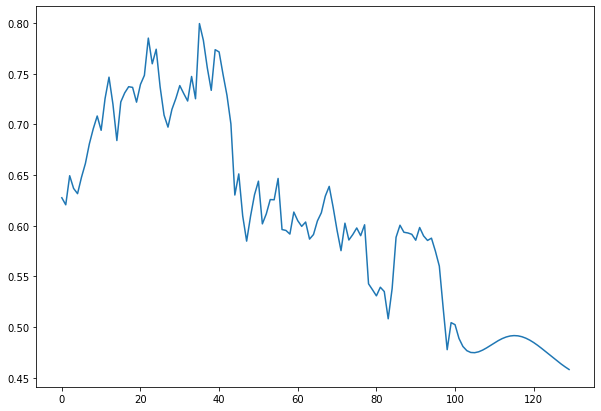

In [45]:
plt.figure(figsize=(10,7))
plt.plot(dff[1135:])
plt.show()

In [48]:
# Predicting the graph for 30 days output
dff = scaler.inverse_transform(dff).tolist()

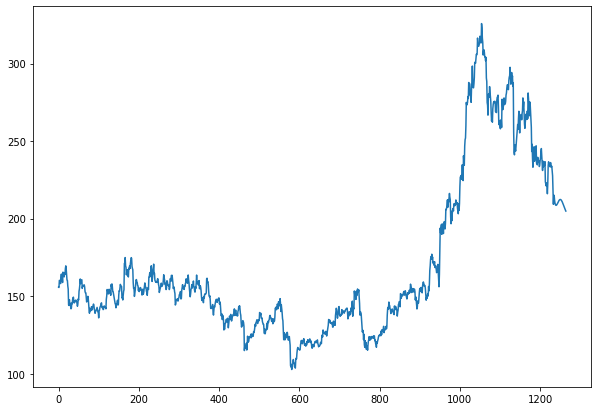

In [49]:
plt.figure(figsize=(10,7))
plt.plot(dff)
plt.show()